In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
df1 = pd.read_csv('../../data/water_potability.csv')


In [5]:
df=df1.drop(['Hardness','Solids','Chloramines','Sulfate','Organic_carbon','Trihalomethanes'],axis=1)
df

,ph,Conductivity,Turbidity,Potability
0,NaN,564.308654,2.963135,0
1,3.716080,592.885359,4.500656,0
2,8.099124,418.606213,3.055934,0
3,8.316766,363.266516,4.628771,0
4,9.092223,398.410813,4.075075,0
...,...,...,...,...
3271,4.668102,526.424171,4.435821,1
3272,7.808856,392.449580,2.798243,1
3273,9.419510,432.044783,3.298875,1
3274,5.126763,402.883113,4.708658,1


In [6]:
ph_mean = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_mean



ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_mean_1




In [7]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
X_train


,ph,Conductivity,Turbidity
3260,7.073783,428.213987,3.699558
3193,6.150034,449.358812,3.444442
719,7.073783,441.986106,4.441980
1160,7.808641,519.862991,2.472720
2475,4.991397,534.711455,3.926599
...,...,...,...
835,7.440825,452.995293,2.496343
3264,5.893103,403.617560,4.390702
1653,6.648005,471.047129,3.829784
2607,7.675914,232.613624,5.040461


In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
models_acc = []
model = RandomForestClassifier()
model.fit(X_train, y_train)    
pred = model.predict(X_test)
models_acc.append(accuracy_score(y_test, pred))
models_acc

[0.6280487804878049]

In [11]:
models_acc = []
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]
for model in models:
    model.fit(X_train, y_train)    
    pred = model.predict(X_test)
    models_acc.append(accuracy_score(y_test, pred))

In [12]:
res = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC']
})
res

,Model Accuracy,Model Name
0,0.626016,LogisticRegression
1,0.532520,KNeighborsClassifier
2,0.654472,RandomForestClassifier
3,0.626016,GaussianNB
4,0.626016,SVC


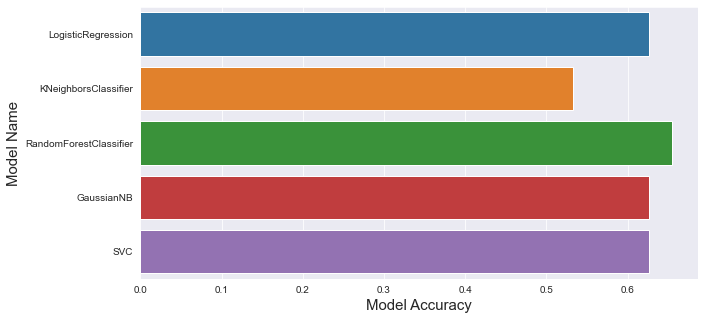

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(res['Model Accuracy'], res['Model Name'])
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15);

In [14]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
accuracy_score(y_test, pred)


0.6565040650406504

In [15]:
X_test1= [[5.126763,	402.883113,	4.708658	]]

pred=model.predict(X_test1)
pred

array([1], dtype=int64)

In [16]:
import tensorflowjs as tfjs